<a href="https://colab.research.google.com/github/akr1139/CO542_LAB_06/blob/main/E17285_CO542_LAB_06(SUBMISSION).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
# !pip install minisom

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Patch
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler

# 1.Load the data set as a pandas’ data frame and generate the feature matrix by selecting the appropriate features in the data set

In [90]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv("/content/diabetes.csv")

# Print the contents of the DataFrame
print(df.head(2))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  


In [74]:
# df.info()

In [75]:
# df.describe()
#outcome is a less complex feature
#it can be dropped


In [76]:
features = df.drop(columns=["Outcome"], axis=1)

In [77]:
class_names = features.columns
data = features.values

# 2.Use sklearn.preprocessing.MinMaxScaler normalize the data between 0 and 1

Map the data between 0 and 1

In [78]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
mm_scaler = MinMaxScaler()

# Normalize the data between 0 and 1
normalized_data = mm_scaler.fit_transform(data)

# The 'normalized_data' variable now contains the normalized values between 0 and 1


In [79]:
# #preprocessing
# #creating the feature matrix

# mm_scaler = MinMaxScaler()
# feature_matrix = mm_scaler.fit_transform(features)

# 3. Initialize the weights using MiniSom.pca_weights_init function (Also identify the usage of random_weights_init method and mention an advantage of using pca_weights_init).

In [80]:
from minisom import MiniSom

# Initialize MiniSom with PCA-based weight initialization
n_neurons = 9
m_neurons = 9
som = MiniSom(n_neurons, m_neurons, normalized_data.shape[1], sigma=1.5, learning_rate=.5,
              neighborhood_function='gaussian', random_seed=0)

In [81]:
from minisom import MiniSom

# Initialize MiniSom with random weight initialization
som = MiniSom(x=10, y=10, input_len=features.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(features.values)


In [82]:
#train the self-organizing map.
som.pca_weights_init(normalized_data)

The advantage of using pca_weights_init is that it leverages the underlying structure and correlations within the input data. By initializing the weights based on the principal components of the data, the SOM can learn the intrinsic patterns and relationships in the data more efficiently. This often leads to a more organized and meaningful representation of the input data in the SOM grid.

# 4. Identify the difference between Minisom.train_batch and Minisom.train_random methods available minisom and use one of the models to train your self-organizing map.

In [83]:
from minisom import MiniSom

# Initialize MiniSom
som = MiniSom(x=10, y=10, input_len=features.shape[1], sigma=1.0, learning_rate=0.5)

# Number of iterations over the dataset
num_epochs = 100

# Train the SOM using batch training
for _ in range(num_epochs):
    som.train_batch(features.values, len(features))


In [84]:
from minisom import MiniSom
import numpy as np

# Initialize MiniSom
som = MiniSom(x=10, y=10, input_len=features.shape[1], sigma=1.0, learning_rate=0.5)

# Number of iterations over the dataset
num_epochs = 100

# Train the SOM using random training
for _ in range(num_epochs):
    np.random.shuffle(features.values)  # Shuffle the data randomly before each epoch
    som.train_random(features.values, len(features))


In [85]:
som.train_random(normalized_data, 1000, verbose=True)  # random training

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.25303372477251984


# 5. Study about the distance map and mention what does it indicate related to the self-organizing maps.


* In self-organizing maps (SOMs), the distance map is a visual representation of the relationships between neurons in the SOM grid.
* It is a 2D array where each element represents the distance between the corresponding neurons in the SOM.
* The distance map helps to visualize how neurons in the SOM respond to different input patterns and how they are organized based on the input data distribution.

* The distance between two neurons in the SOM grid is typically calculated using a distance metric, such as Euclidean distance. For a given neuron at position (i, j) in the grid, its distance from other neurons (x, y) can be calculated as:

$\operatorname{Distance}((i, j),(x, y))=\sqrt{(i-x)^2+(j-y)^2}$

Here's what the distance map indicates related to self-organizing maps:

1. **Topological Relationships**: Neurons that are close to each other in the SOM grid have similar response patterns and tend to represent similar or related input data points. The distance map visualizes the topological relationships between neurons. Neurons that are nearby in the distance map are also close in the input space, indicating that they respond similarly to similar input patterns.

2. **Clustered Regions**: Clusters of neurons with similar response patterns are represented as contiguous areas of low values in the distance map. These clustered regions indicate groups of neurons that have learned to respond to specific features or patterns in the input data. Neurons within the same cluster on the distance map are highly interconnected and represent similar input features.

3. **Mapping of Input Space**: The distance map provides a way to map the high-dimensional input space onto a 2D grid. Each neuron in the SOM corresponds to a specific region in the input space. By analyzing the distance map, you can understand how different regions of the input space are represented and organized by the SOM.

4. **Quantification of SOM Quality**: The smoothness and continuity of the distance map reflect the quality of the SOM. A well-trained SOM will have a smooth and continuous distance map, indicating that similar input patterns are mapped to nearby regions in the SOM grid. Discontinuities or abrupt changes in the distance map might suggest issues with the training process or the quality of the input data.

In summary, the distance map in self-organizing maps provides valuable insights into the organization of the SOM grid, helping researchers and data analysts interpret the learned representations, identify clusters, and understand the relationships between different regions of the input space.

# 6. Use Minisom.distance_map function to visualize the results obtained from the training process anduse appropriate markers to indicate individual samples matched into each cell (according to the classes;patient who has diabetes/ do not have diabetes define two markers).


In [86]:
# from minisom import MiniSom
# import numpy as np
# import matplotlib.pyplot as plt

# # Initialize MiniSom with appropriate parameters
# som = MiniSom(x=10, y=10, input_len=features.shape[1], sigma=1.0, learning_rate=0.5)

# # Number of epochs (iterations over the entire dataset)
# num_epochs = 100

# # Train the SOM by iterating over the dataset multiple times
# for epoch in range(num_epochs):
#     np.random.shuffle(features.values)  # Shuffle the data randomly before each epoch
#     for i, x in enumerate(features.values):
#         som.update(x, som.winner(x), epoch, num_epochs)  # Update the SOM weights for each sample

# # Get the distance map
# distance_map = som.distance_map()

# # Create a scatter plot to visualize the distance map
# plt.figure(figsize=(10, 10))
# for i, x in enumerate(features.values):
#     # Find the best matching unit (BMU)
#     bmu = som.winner(x)

#     # Determine the marker style based on the class (diabetes or no diabetes)
#     marker = 'o' if df.iloc[i]['Outcome'] == 0 else 's'

#     # Plot the marker on the distance map at the BMU coordinates
#     plt.plot(bmu[0] + 0.5, bmu[1] + 0.5, marker, markerfacecolor='None', markersize=10, markeredgecolor='r', markeredgewidth=2)

# # Plot the distance map as an image
# plt.imshow(distance_map, cmap='bone_r', interpolation='nearest')

# # Show the plot
# plt.title('Self-Organizing Map - Distance Map with Sample Markers')
# plt.colorbar()
# plt.show()



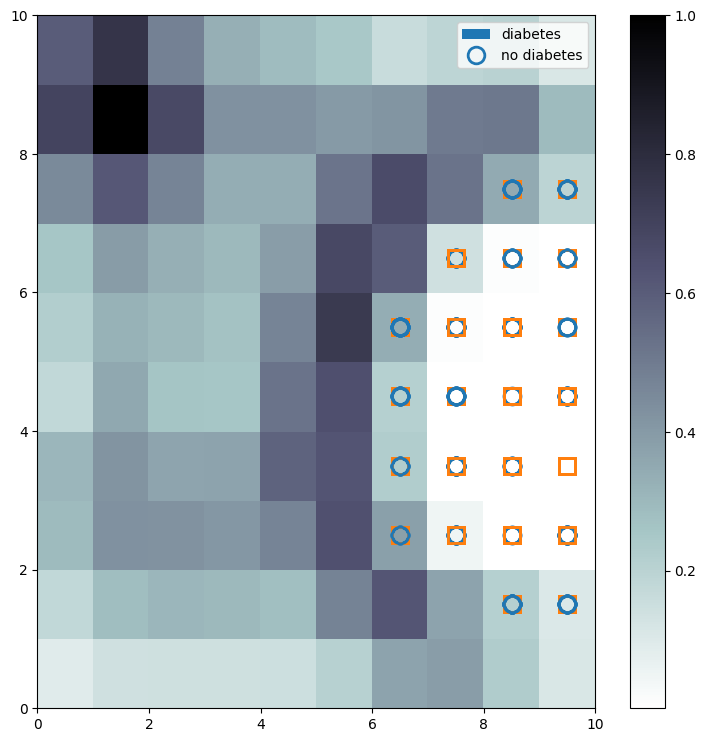

In [87]:
#plot the distance map
plt.figure(figsize=(9, 9))

plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()

#Plotting the response for each pattern in the diabetes dataset
#different colors and markers for each label
#only two output labels
#two type of colors and markers
markers = ['o', 's']
colors = ['C0', 'C1']

outcomes = df['Outcome'].values

for cnt, xx in enumerate(normalized_data):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[outcomes[cnt]-1], markerfacecolor='None',
             markeredgecolor=colors[outcomes[cnt]-1], markersize=12, markeredgewidth=2)
plt.legend(["diabetes","no diabetes"])
plt.show()

# 7. Generate another grid to indicate how often each neuron is activated using, MiniSom.activation_response.


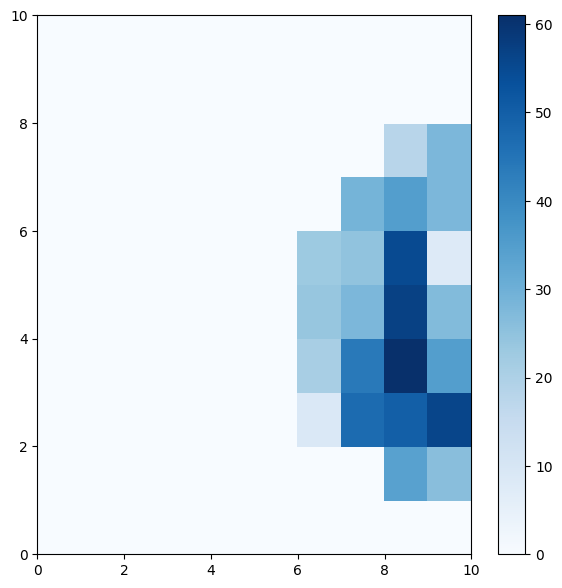

In [88]:
#how often each neuron is activated
plt.figure(figsize=(7, 7))
frequencies = som.activation_response(normalized_data)
plt.pcolor(frequencies.T, cmap='Blues')
plt.colorbar()
plt.show()

# 8. Visualize the proportion of samples per class falling in a specific neuron using the, matplotlib.gridspec.GridSpec and matplotlib.patches.Patcha

IndexError: ignored

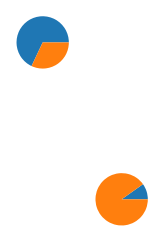

In [89]:
#visualize the proportion of samples per class
label_names = {1:'has_diabetes', 0:'no_diabetes'}
labels_map = som.labels_map(normalized_data, [label_names[t] for t in outcomes])

fig = plt.figure(figsize=(9, 9))
the_grid = GridSpec(n_neurons, m_neurons, fig)
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names.values()]
    plt.subplot(the_grid[n_neurons-1-position[1],
                         position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)

plt.legend(patches, label_names.values(), bbox_to_anchor=(7.5, 11.5), ncol=3)
plt.show()